In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [19]:
# punto (a)
a=np.array([3.1, 1, -0.5, -3.2, 6])
b=np.array([1, 3, 2.2, 5.1, 1])
# punto (b)
escalar=a@b
print('Multiplicacion escalar de a y b es:',escalar)
print('-'*70)
# punto (c)
punto= a*b
print('la multiplicacion punto a punto de a y b es:',punto)
print('-'*70)
# Punto (d)
matriz=np.array([[2,-1,-3],[4,1.5,-2.5],[7.3,-0.9,0.2]])
print(matriz)
print('-'*70)
# punto(e)
AT=matriz.T
print('TRANSPUESTA:')
print(AT)
print('-'*70)


Multiplicacion escalar de a y b es: -5.32
----------------------------------------------------------------------
la multiplicacion punto a punto de a y b es: [  3.1    3.    -1.1  -16.32   6.  ]
----------------------------------------------------------------------
[[ 2.  -1.  -3. ]
 [ 4.   1.5 -2.5]
 [ 7.3 -0.9  0.2]]
----------------------------------------------------------------------
TRANSPUESTA:
[[ 2.   4.   7.3]
 [-1.   1.5 -0.9]
 [-3.  -2.5  0.2]]
----------------------------------------------------------------------


*punto (f)*

np.ones() -> Crea un arreglo lleno de unos con el tamano indicado


In [21]:
ones=np.ones((3,5))
print(ones)
print('-'*70)

[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]
----------------------------------------------------------------------


np.round()-> Redondea los numeros decimales a las cifras que se le indique

In [24]:
round=np.array([3.1415 , 4,1415 , 5.1314])
print(np.round(round,2))
print('-'*70)

[   3.14    4.   1415.      5.13]
----------------------------------------------------------------------


np.ceil() -> redondea hacia arriba al ENTERO mayor cercano

In [26]:
ceil=np.array([1.5 , 2.5, 3.5])
print(np.ceil(ceil))
print('-'*70)

[2. 3. 4.]
----------------------------------------------------------------------


np.floor() -> redondea hacia abajo al entero menor cercano

In [27]:
floor=np.array([1.5 , 2.5, 3.5])
print(np.floor(floor))
print('-'*70)

[1. 2. 3.]
----------------------------------------------------------------------


In [36]:
#punto (g)
print('El numero de la primera fila y tercera columna de la matriz es:',matriz[0,2])
print('-'*70)

#punto (h)
print('La segunda fila de la matriz es:', matriz[1])
print('-'*70)

#punto (i)
print('el comando para conocer las dimesiones de una matriz es: "shape" ')
print(matriz.shape)
print('-'*70)



El numero de la primera fila y tercera columna de la matriz es: -3.0
----------------------------------------------------------------------
La segunda fila de la matriz es: [ 4.   1.5 -2.5]
----------------------------------------------------------------------
el comando para conocer las dimesiones de una matriz es: "shape" 
(3, 3)
----------------------------------------------------------------------


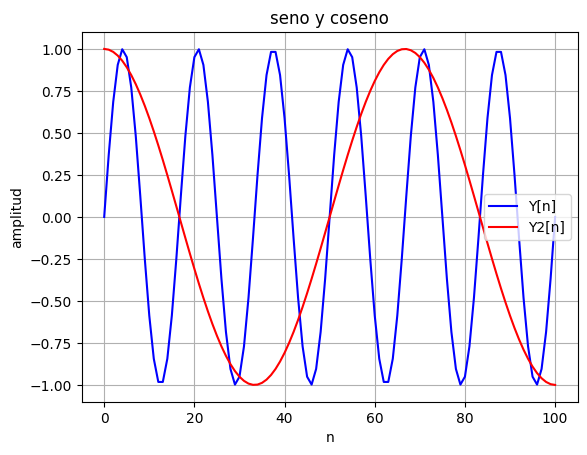

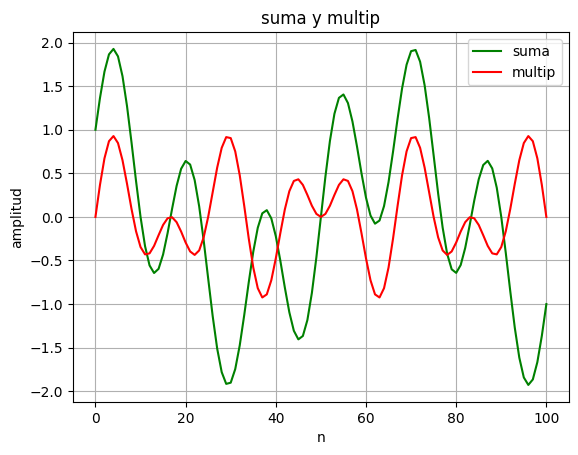

In [42]:
#punto (j)
n=np.arange(0,101)
y= np.sin(np.pi *0.12*n )
#punto (k)
y2=np.cos(np.pi *0.03 * n)
#punto (l)
s=y+y2
t=y*y2
#punto (m)
plt.figure()
plt.plot(n,y,"b" , label='Y[n]')
plt.plot(n,y2, 'r', label="Y2[n]")
plt.xlabel('n')
plt.ylabel('amplitud')
plt.title('seno y coseno')
plt.legend()
plt.grid(True)

plt.show()

#punto(n)
plt.figure()
plt.plot(n,s,"g" , label='suma')
plt.plot(n,t, 'r', label="multip")
plt.xlabel('n')
plt.ylabel('amplitud')
plt.title('suma y multip')
plt.legend()
plt.grid(True)





Repaso PANDAS

In [2]:
#punto 1
#funcion 

def notas_alumnos(diccionario):
    serie= pd.Series(diccionario)

    min= serie.min()
    max= serie.max()
    media= serie.mean()
    desviacion = serie.std()

    result= pd.Series({
        "nota minima":min,
        "nota maxima":max,
        "media":media,
        "Desviacion tipica":desviacion 
    })
    return result



Punto 2 (IMC)

In [3]:
df=pd.read_csv("datos.csv", sep=";") #recordar el sep 
print(df.head())
print('-'*70)
print(df.tail())
print('-'*70)
print("Eliminar Unnamed")
#usar df.drop
df.drop("Unnamed: 0", axis= 1 , inplace=True)
print(df.columns)


   Unnamed: 0  Gender  FSIQ  VIQ  PIQ  Weight  Height  MRI_Count
0           1  Female   133  132  124   118.0    64.5     816932
1           3    Male   139  123  150   143.0    73.3    1038437
2           4    Male   133  129  128   172.0    68.8     965353
3           5  Female   137  132  134   147.0    65.0     951545
4           6  Female    99   90  110   146.0    69.0     928799
----------------------------------------------------------------------
    Unnamed: 0  Gender  FSIQ  VIQ  PIQ  Weight  Height  MRI_Count
33          36  Female   133  129  128   153.0    66.5     948066
34          37    Male   140  150  124   144.0    70.5     949395
35          38  Female    88   86   94   139.0    64.5     893983
36          39    Male    81   90   74   148.0    74.0     930016
37          40    Male    89   91   89   179.0    75.5     935863
----------------------------------------------------------------------
Eliminar Unnamed
Index(['Gender', 'FSIQ', 'VIQ', 'PIQ', 'Weight', 'Heigh

In [11]:
#segun como se muestra la tabla la altura no tiene logica
#tomare los valores de altura y peso intercambiando sus valores de cada columna
altura=df["Weight"]/100
df["BMI"]=df["Height"]/(altura**2)
print(df.head())
condiciones = [
    df["BMI"] < 18.5,
    (df["BMI"] >= 18.5) & (df["BMI"] < 25),
    (df["BMI"] >= 25) & (df["BMI"] < 30),
    df["BMI"] >= 30
]

categorias = ["Bajo peso", "Normal", "Sobrepeso", "Obesidad"]
df["Categoria_BMI"] = np.select(condiciones, categorias, default="Sin categoria")

print("-"*70)
print(df.head())

   Gender  FSIQ  VIQ  PIQ  Weight  Height  MRI_Count        BMI Categoria_BMI
0  Female   133  132  124   118.0    64.5     816932  46.322896      Obesidad
1    Male   139  123  150   143.0    73.3    1038437  35.845274      Obesidad
2    Male   133  129  128   172.0    68.8     965353  23.255814        Normal
3  Female   137  132  134   147.0    65.0     951545  30.080059      Obesidad
4  Female    99   90  110   146.0    69.0     928799  32.370051      Obesidad
----------------------------------------------------------------------
   Gender  FSIQ  VIQ  PIQ  Weight  Height  MRI_Count        BMI Categoria_BMI
0  Female   133  132  124   118.0    64.5     816932  46.322896      Obesidad
1    Male   139  123  150   143.0    73.3    1038437  35.845274      Obesidad
2    Male   133  129  128   172.0    68.8     965353  23.255814        Normal
3  Female   137  132  134   147.0    65.0     951545  30.080059      Obesidad
4  Female    99   90  110   146.0    69.0     928799  32.370051      Ob